In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [39]:
df = pd.read_csv('../../data/titanic.csv')

In [15]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in 'Age' column if any
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing values in 'Embarked' column if any
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' column if it exists
df = df.drop(columns=['Cabin'], errors='ignore')


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [41]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,FamilySize
0,0,3,1,22.0,7.2500,False,False,2
1,1,1,0,38.0,71.2833,True,False,2
2,1,3,0,26.0,7.9250,False,False,1
3,1,1,0,35.0,53.1000,False,False,2
4,0,3,1,35.0,8.0500,False,False,1


In [40]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=False)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Embarked_S', 'Cabin'], errors='ignore')


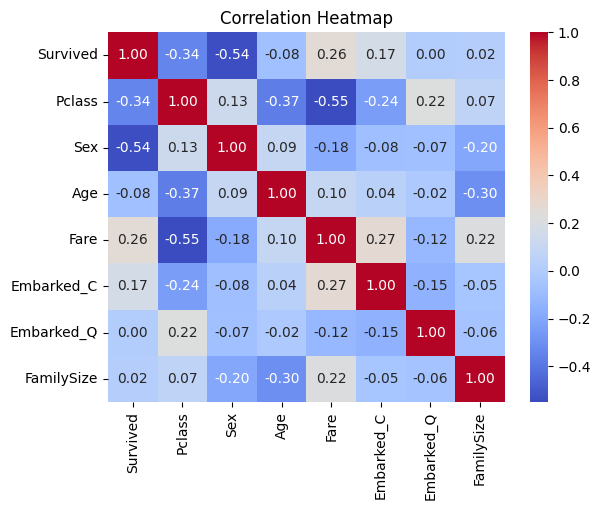

In [42]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/var/folders/01/3jwc30js5pndkq3k6gmjmhg80000gn/T/ipykernel_7990/1780060416.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', palette='pastel')


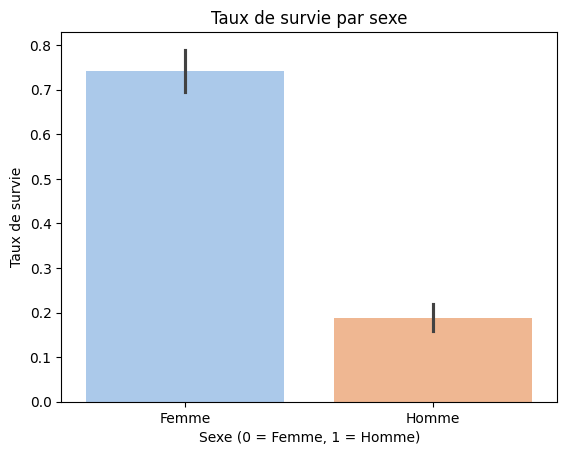

In [48]:
sns.barplot(data=df, x='Sex', y='Survived', palette='pastel')
plt.xticks([0, 1], ['Femme', 'Homme'])
plt.title('Taux de survie par sexe')
plt.xlabel('Sexe (0 = Femme, 1 = Homme)')
plt.ylabel('Taux de survie')
plt.show()

/var/folders/01/3jwc30js5pndkq3k6gmjmhg80000gn/T/ipykernel_7990/1575770020.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', palette='pastel')


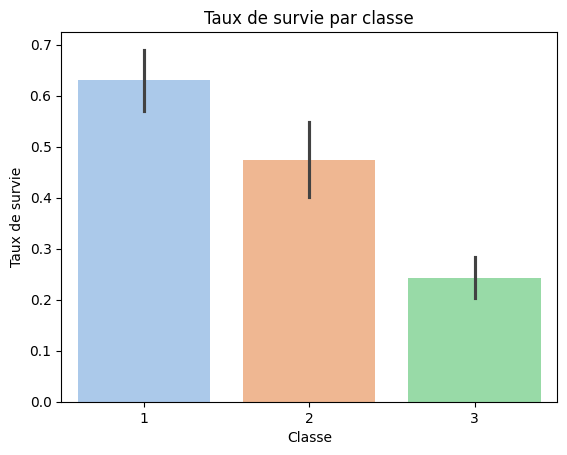

In [49]:
sns.barplot(data=df, x='Pclass', y='Survived', palette='pastel')
plt.xticks([0, 1, 2], ['1', '2', '3'])
plt.title('Taux de survie par classe')
plt.xlabel('Classe')
plt.ylabel('Taux de survie')
plt.show()

/var/folders/01/3jwc30js5pndkq3k6gmjmhg80000gn/T/ipykernel_7990/640763183.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Fare', y='Survived', palette='pastel')


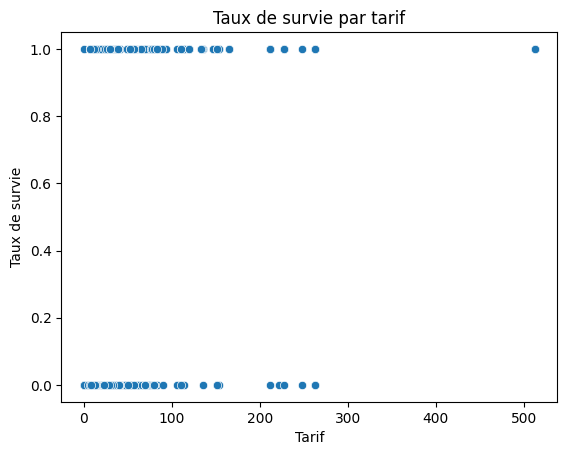

In [51]:
sns.scatterplot(data=df, x='Fare', y='Survived', palette='pastel')
plt.title('Taux de survie par tarif')
plt.xlabel('Tarif')
plt.ylabel('Taux de survie')
plt.show()